<a href="https://colab.research.google.com/github/FulISun/AI_ML-DL_Intermediate/blob/main/00_intro_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn

- https://scikit-learn.org/stable/

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 특징

- 가장 유명한 머신러닝 알고리즘

- 다양한 머신러닝 알고리즘을 효율적으로 구현하여 제공

- 서로 다른 알고리즘에 동일한 인터페이스 제공

- numpy, padas등 다른 라이브러리와 높은 호환성

- 알고리즘은 Classifier와 Regressor로 구성됨

## 입력

### 특징 행렬

- 알고리즘의 입력으로 주로 변수명을 `X_train`, `X_test`로 코딩하고 항상 `(N,D)`가 되는 행렬

### 대상 배열
    
- 지도 학습에서 알고리즘의 예측 대상으로 주로 `y_train`, `y_test`로 코딩하고 항상 `(N,)`인 벡터

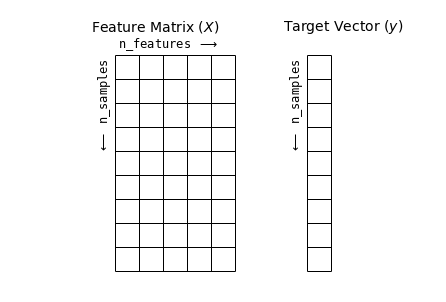

In [ ]:
# source: https://jakevdp.github.io/PythonDataScienceHandbook/06.00-figure-code.html#Features-and-Labels-Grid

fig = plt.figure(figsize=(6, 4))
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
ax.axis('equal')

# Draw features matrix
ax.vlines(range(6), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=0, xmax=5, lw=1)
font_prop = dict(size=12, family='monospace')
ax.text(-1, -1, "Feature Matrix ($X$)", size=14)
ax.text(0.1, -0.3, r'n_features $\longrightarrow$', **font_prop)
ax.text(-0.1, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

# Draw labels vector
ax.vlines(range(8, 10), ymin=0, ymax=9, lw=1)
ax.hlines(range(10), xmin=8, xmax=9, lw=1)
ax.text(7, -1, "Target Vector ($y$)", size=14)
ax.text(7.9, 0.1, r'$\longleftarrow$ n_samples', rotation=90,
        va='top', ha='right', **font_prop)

ax.set_ylim(10, -2)

plt.show()

## API 표준 사용법

1. 적절한 추정기(알고리즘)을 임포트 한다.
2. 임포트한 추정기를 객체로 만든다. 이때 각 알고리즘이 요구하는 초모수hyper parameters를 선택한다.
3. 데이터를 '입력'에서 이야기한 방식으로 맞춘다.
4. `fit(X, y)`해서 모델을 데이터에 피팅한다.
5. 모델을 새 데이터에 적용한다.
    - `predict()`: 모델 예측값을 출력
    - `predict_proba()`: 모델 예측의 확률을 출력
    - `transform()`: 입력을 적절한 형태로 변환, 예) 단어를 벡터로 변환

### `predict()`, `predict_proba()`

In [ ]:
from sklearn import tree

X_train = [[0, 0], [1, 1]]
y_train = [0, 1]

######################################
# 결정트리 생성과 fit[+]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
#########################
# 예측[+]
clf.predict([[2., 2.]])
# 타겟 예측
clf.predict([[0,1]]) 

# 확률로 예측
clf.predict_proba([[0,1]])

array([[1., 0.]])

### `transform()`

In [ ]:
# 스케일러 transform 하는것
# 데이터의 최대값과 최소값을 사용해 0~1로 점위를 수정

# 모델로딩
from sklearn.preprocessing import MinMaxScaler


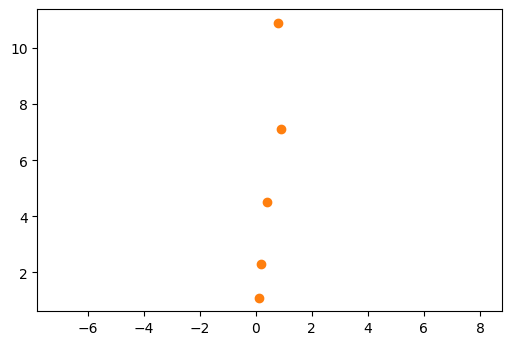

[[ 0.1  1.1]
 [ 0.8 10.9]
 [ 0.4  4.5]
 [ 0.2  2.3]
 [ 0.9  7.1]]


In [ ]:
X_train = np.array([[0.1, 0.8, 0.4, 0.2, 0.9], [1.1, 10.9, 4.5, 2.3, 7.1]]).T
                    
fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X_train[:,0], X_train[:,1], 'o', color='C1')
ax.axis('equal')

plt.show()

print(X_train)

In [ ]:
# 모델 생성과 fit[+]
scaler = MinMaxScaler()
scaler.fit(X_train)
print(scaler.data_max_, scaler.data_min_) # 각 column마다 추출



[ 0.9 10.9] [0.1 1.1]


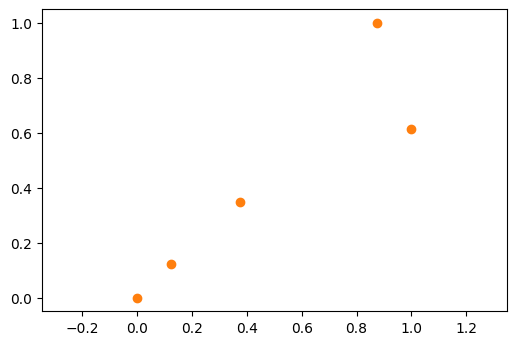

[[0.         0.        ]
 [0.875      1.        ]
 [0.375      0.34693878]
 [0.125      0.12244898]
 [1.         0.6122449 ]]


In [ ]:
# transform[+]
X_train_scaled = scaler.transform(X_train)

fig = plt.figure(dpi=100)
ax = plt.axes()

ax.plot(X_train_scaled[:,0], X_train_scaled[:,1], 'o', color='C1')
ax.axis('equal')

plt.show()

print(X_train_scaled)

## 제공되는 기본 데이터 


### Iris

In [ ]:
# 데이터 로딩[+]
from sklearn.datasets import load_iris

iris = load_iris()

In [ ]:
# description[+]
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
# 데이터 확인[+]
print(type(iris.data))
iris.data[:10]

<class 'numpy.ndarray'>


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [ ]:
# 타겟 확인[+]
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###  Breast Cancer

In [ ]:
# 데이터 로딩[+]
from sklearn.datasets import load_breast_cancer
breast_cancer = load_breast_cancer()

In [ ]:
# description[+]

print(breast_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
# 데이터 확인[+]
'''df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
sy = pd.Series(breast_cancer.target, dtype="category")
sy = sy.cat.rename_categories(breast_cancer.target_names)
df['class'] = sy
df.tail()'''

breast_cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [ ]:
# 타겟 확인[+]
print(breast_cancer.target)
breast_cancer.target_names

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

array(['malignant', 'benign'], dtype='<U9')

### Boston House Price

In [ ]:
# 데이터 로딩[+]
from sklearn.datasets import load_boston
boston = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# description[+]
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# 데이터 확인[+]
print(boston.data[:2])


dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df_house = pd.concat([dfX, dfy], axis=1)
df_house.tail(10)

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [ ]:
# 타겟 확인[+]
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Digits

In [ ]:
# 데이터 로딩[+]
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# description[+]
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [ ]:
# 데이터 확인, 타겟 확인[+]
samples = digits.data[:10]
print(samples.shape)
samples = samples.reshape(10, 8, 8)

(10, 64)


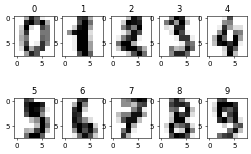

In [ ]:
fig, ax = plt.subplots(dpi=50, nrows=2, ncols=5)

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(samples[i], cmap='binary')
    ax_i.set_title(digits.target[i])

plt.show()

### MNIST

In [ ]:
def digits_10(samples):
    """
    samples:(10,784), Mnist 숫자 10개

    출력은 (2,5)로 숫자가 배열된 숫자 이미지
    """
    samples2 = samples.reshape(10, 28, 28).transpose(1,0,2).reshape(28,-1)\
    .reshape(28,1,-1).reshape(28,-1,140).transpose(1,0,2).reshape(-1,140)

    fig = plt.figure(figsize=(10,5))
    ax = plt.axes()
    ax.imshow(samples2, cmap='binary')
    plt.show()

(20000, 784) (20000,)


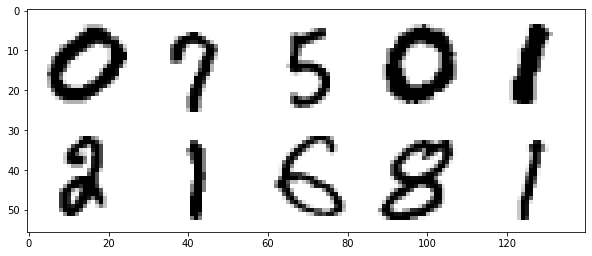

In [ ]:
np.random.seed(10)

# 데이터 로딩 및 확인[+]
mnist = pd.read_csv("sample_data/mnist_train_small.csv", header=None)

X = mnist.iloc[:,1:].to_numpy()
y = mnist.iloc[:,0].to_numpy()

print(X.shape, y.shape)
idx = np.random.choice(X.shape[0], 10)
samples = X[idx]

digits_10(samples)


### make_blobs

- 분류용 군집 데이터 생성

In [ ]:
# 데이터 로딩 및 확인
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=10, centers=3, n_features=2,random_state=0) #이거 아냐..
print(X[:10])
print(y[:10])

[[ 1.12031365  5.75806083]
 [ 1.7373078   4.42546234]
 [ 2.36833522  0.04356792]
 [ 0.87305123  4.71438583]
 [-0.66246781  2.17571724]
 [ 0.74285061  1.46351659]
 [-4.07989383  3.57150086]
 [ 3.54934659  0.6925054 ]
 [ 2.49913075  1.23133799]
 [ 1.9263585   4.15243012]]
[0 0 1 0 2 2 2 1 1 0]


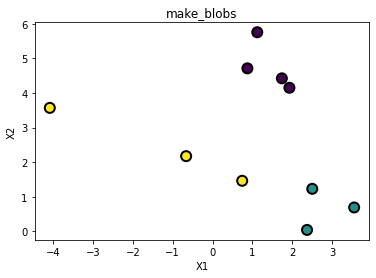

In [ ]:
# 그림으로 확인[*]
fig = plt.figure()
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("make_blobs")

plt.show()

### make_moons

- 초승달 모양 데이터 두 집단을 생성

In [ ]:
# 데이터 로딩 및 확인
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 200, noise = 0.1, random_state= 0 )

print(X[:10])
print(y[:10])

[[ 0.79235735  0.50264857]
 [ 1.63158315 -0.4638967 ]
 [-0.06710927  0.26776706]
 [-1.04412427 -0.18260761]
 [ 1.76704822 -0.19860987]
 [ 1.90607398 -0.07109159]
 [ 0.96219213  0.26198607]
 [ 0.88681385 -0.48489624]
 [ 0.8689352   0.36109278]
 [ 1.15352953 -0.57235293]]
[0 1 1 0 1 1 0 1 0 1]


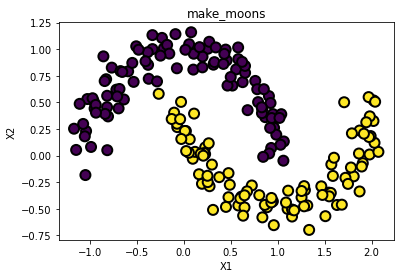

In [ ]:
# 그림으로 확인[*]
fig = plt.figure()
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("make_moons")

plt.show()

### make_gaussian_quantiles

- 다변수 정규 분포를 따르는 점들을 생성

In [ ]:
# 데이터 로딩 및 확인[+]
from sklearn.datasets import make_gaussian_quantiles

X, y = make_gaussian_quantiles(n_samples=200, n_features=2, n_classes=2, random_state=0)

print(X[:10])
print(y[:10])

[[-0.34791215  0.15634897]
 [-1.04855297 -1.42001794]
 [-0.39944903  0.37005589]
 [ 0.93184837  0.33996498]
 [-0.87079715 -0.57884966]
 [ 0.15650654  0.23218104]
 [-0.36918184 -0.23937918]
 [-0.49803245  1.92953205]
 [ 1.49448454 -2.06998503]
 [-0.36469354  0.15670386]]
[0 1 0 0 0 0 0 1 1 0]


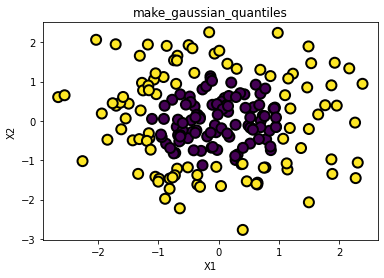

In [ ]:
# 그림으로 확인
fig = plt.figure()
ax = plt.axes()

ax.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100,
            edgecolor="k", linewidth=2)

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title("make_gaussian_quantiles")

plt.show()